In [1]:
from IPython.display import Image
from os import environ
from os.path import abspath
from matplotlib.pyplot import figure


# Example for Brain-Extraction


190319-08:27:54,408 nipype.workflow INFO:
	 Generated workflow graph: ./graph_colored.png (graph2use=colored, simple_form=True).


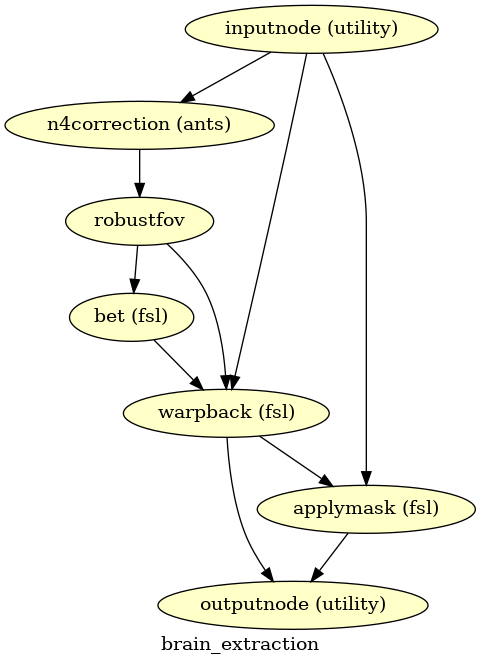

In [2]:
from brainextract_workflow import brain_extraction_wf

wf = brain_extraction_wf()
# Set inputfile
wf.inputs.inputnode.in_file = abspath('data/spgr_tr5400_fa18000.nii.gz')
wf.inputs.bet.frac=0.5
wf.inputs.bet.vertical_gradient=0.1

wf.inputs.n4correction.args="-r 1"

wf.base_dir = abspath('tmp')
# Create Graph
wf.write_graph(graph2use='colored', dotfilename='./graph_colored.dot')
# Visualize graph
Image(filename="graph_colored.png")



In [ ]:
wf.run()

In [ ]:
%matplotlib inline

from nilearn import plotting, image
fig = figure(figsize=(20,9))
img = image.load_img('data/spgr_tr5400_fa18000.nii.gz')
plotting.plot_roi('tmp/brain_extraction/warpback/spgr_tr5400_fa18000_corrected_ROI_brain_mask_flirt.nii.gz',
                  img, draw_cross=False, figure=fig, alpha=0.4)
plotting.show()

# Preparation of mcdespot

The *prepare_mcdespot*-Workflow can be used to input irspgr, spgr and ssfp (phase 0 and 180) and align and motion-correct all images. The results are:

   - irspgr
   - spgr (4D)
   - ssfp0 (4D)
   - ssp180 (4D)
   - brainmask
   - target image (for registration $\Rightarrow$ SPGR with largest flipangle)
   
All results can be fetched from `outputnode`.

190319-08:27:58,979 nipype.workflow INFO:
	 Generated workflow graph: ./graph_colored.png (graph2use=colored, simple_form=True).


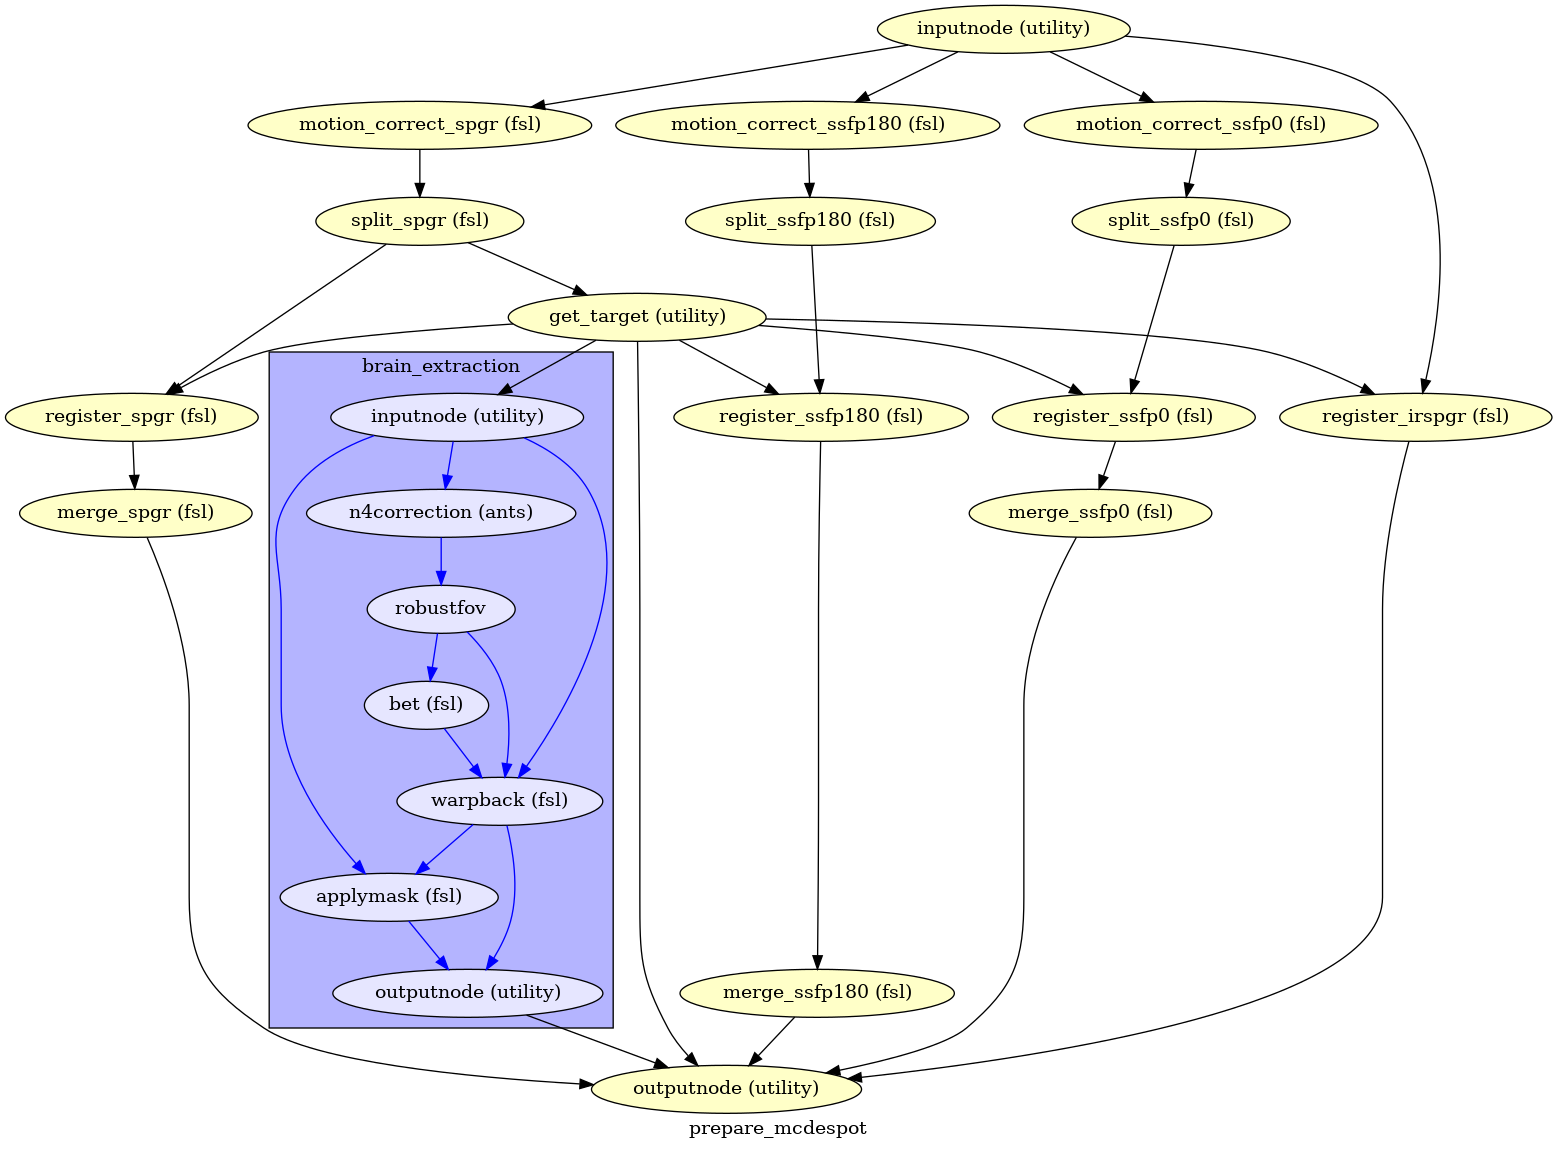

In [3]:
from despot_workflow import prepare_mcdespot

wf = prepare_mcdespot()

# Create Graph
wf.write_graph(graph2use='colored', dotfilename='./graph_colored.dot')
# Visualize graph
Image(filename="graph_colored.png")

In [4]:
wf.base_dir = abspath('tmp')

# Set inputs of inputnode
wf.inputs.inputnode.in_irspgr = abspath('data/sub-xmpl_acq-irspgr_T1w.nii')
wf.inputs.inputnode.in_spgr = abspath('data/sub-xmpl_acq-SPGR_T1w.nii')
wf.inputs.inputnode.in_ssfp0 = abspath('data/sub-xmpl_acq-SSFP_phase-0_T2w.nii')
wf.inputs.inputnode.in_ssfp180 = abspath('data/sub-xmpl_acq-SSFP_phase-180_T2w.nii')

wf.run()

190319-08:28:02,201 nipype.workflow INFO:
	 Workflow prepare_mcdespot settings: ['check', 'execution', 'logging', 'monitoring']
190319-08:28:02,233 nipype.workflow INFO:
	 Running serially.
190319-08:28:02,234 nipype.workflow INFO:
	 [Node] Setting-up "prepare_mcdespot.motion_correct_ssfp180" in "/home/jovyan/work/wmi_workflows/tmp/prepare_mcdespot/motion_correct_ssfp180".
190319-08:28:02,237 nipype.workflow INFO:
	 [Node] Cached "prepare_mcdespot.motion_correct_ssfp180" - collecting precomputed outputs
190319-08:28:02,239 nipype.workflow INFO:
	 [Node] "prepare_mcdespot.motion_correct_ssfp180" found cached.
190319-08:28:02,240 nipype.workflow INFO:
	 [Node] Setting-up "prepare_mcdespot.split_ssfp180" in "/home/jovyan/work/wmi_workflows/tmp/prepare_mcdespot/split_ssfp180".
190319-08:28:02,245 nipype.workflow INFO:
	 [Node] Cached "prepare_mcdespot.split_ssfp180" - collecting precomputed outputs
190319-08:28:02,246 nipype.workflow INFO:
	 [Node] "prepare_mcdespot.split_ssfp180" found ca

190319-08:28:05,407 nipype.workflow INFO:
	 [Node] Finished "prepare_mcdespot.merge_ssfp0".
190319-08:28:05,409 nipype.workflow INFO:
	 [Node] Setting-up "prepare_mcdespot.register_spgr" in "/home/jovyan/work/wmi_workflows/tmp/prepare_mcdespot/register_spgr".
190319-08:28:05,416 nipype.workflow INFO:
	 [Node] "prepare_mcdespot.register_spgr" found cached.
190319-08:28:05,417 nipype.workflow INFO:
	 [Node] Setting-up "prepare_mcdespot.merge_spgr" in "/home/jovyan/work/wmi_workflows/tmp/prepare_mcdespot/merge_spgr".
190319-08:28:05,424 nipype.workflow INFO:
	 [Node] Running "merge_spgr" ("nipype.interfaces.fsl.utils.Merge"), a CommandLine Interface with command:
fslmerge -t vol0000_flirt_merged.nii.gz /home/jovyan/work/wmi_workflows/tmp/prepare_mcdespot/register_spgr/mapflow/_register_spgr0/vol0000_flirt.nii.gz /home/jovyan/work/wmi_workflows/tmp/prepare_mcdespot/register_spgr/mapflow/_register_spgr1/vol0001_flirt.nii.gz /home/jovyan/work/wmi_workflows/tmp/prepare_mcdespot/register_spgr/

190911-14:29:58,493 nipype.workflow INFO:
	 Generated workflow graph: ./graph_colored.png (graph2use=colored, simple_form=True).


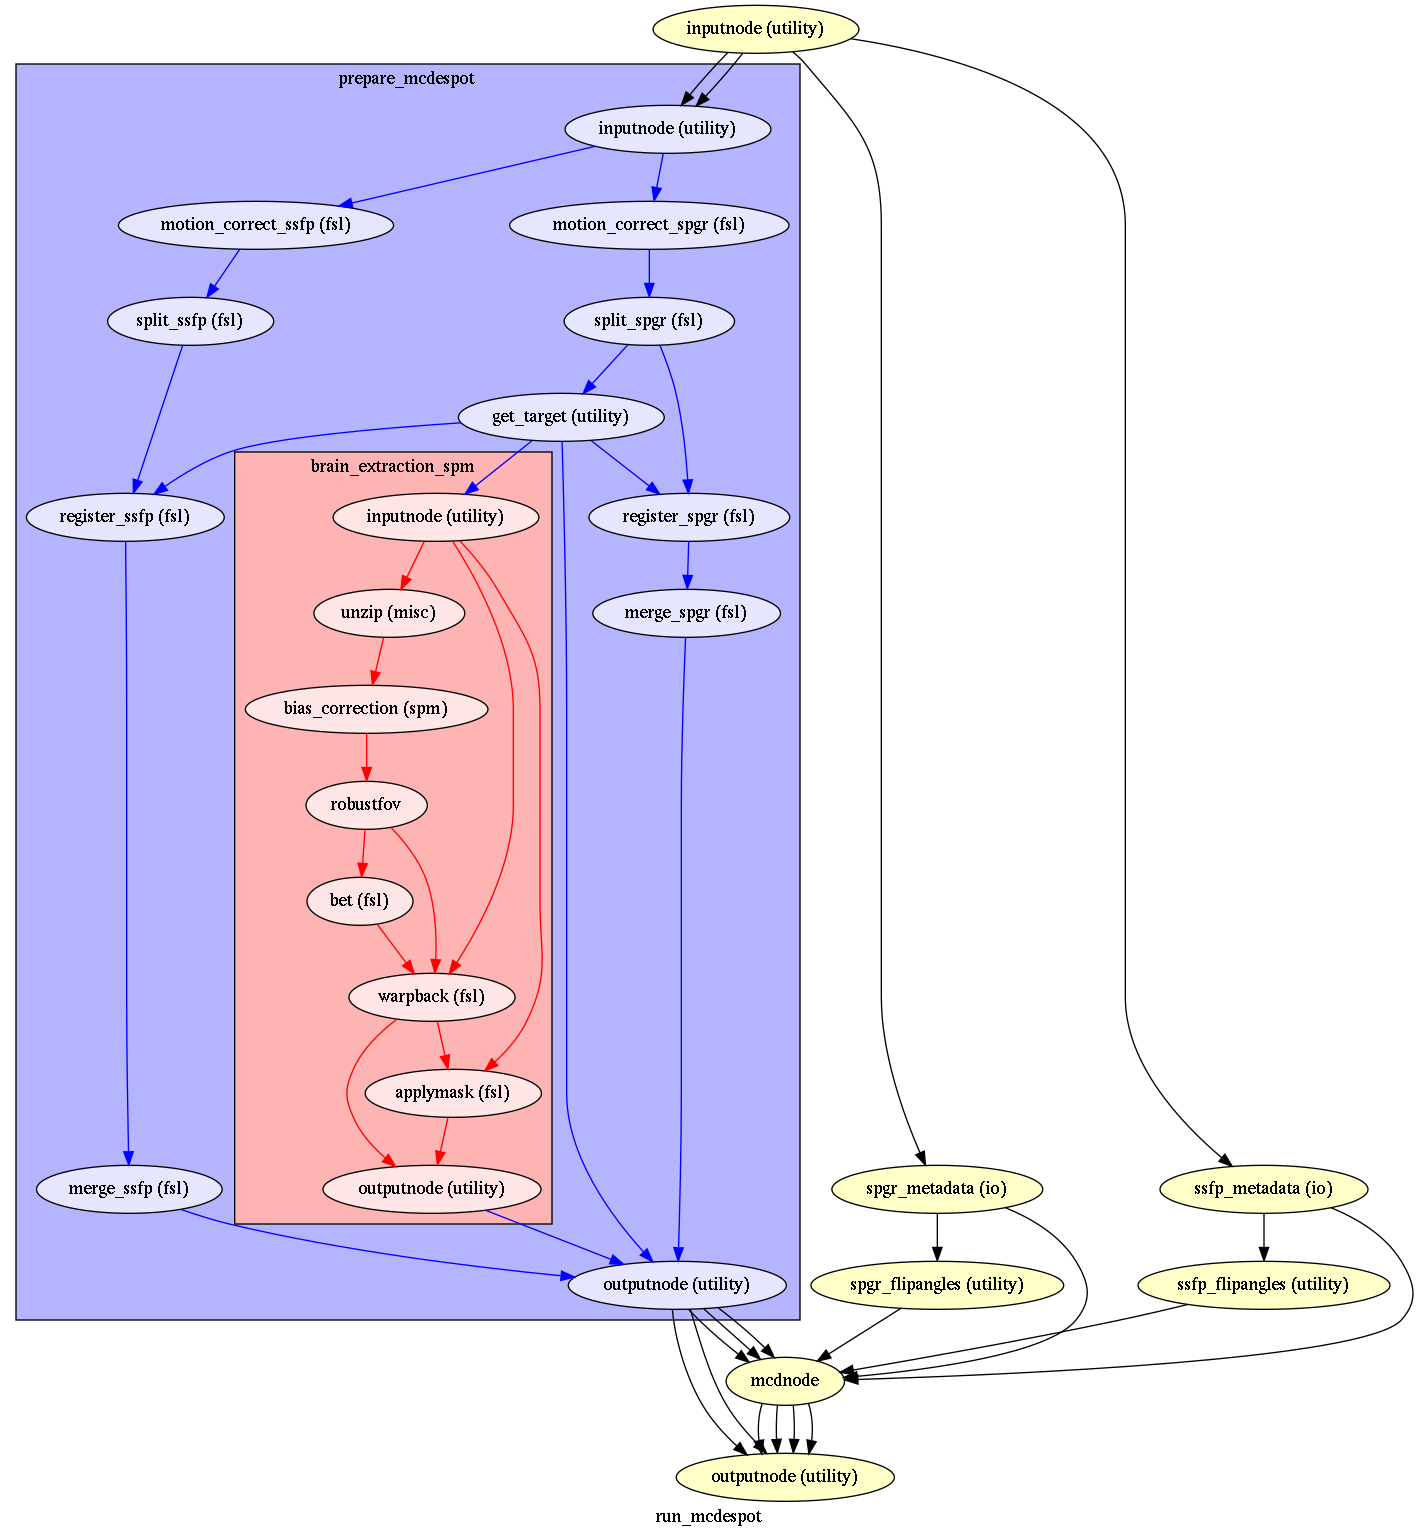

In [2]:
from wmi_nipype_workflows import run_mcdespot

wf = run_mcdespot(spm_biasfilter=True, use_twopool=True)
# Create Graph
wf.write_graph(graph2use='colored', dotfilename='./graph_colored.dot')
# Visualize graph
Image(filename="graph_colored.png")